In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [16]:
train=pd.read_csv('train.csv')
test=pd.read_csv("test.csv")

In [17]:
train.shape

(42000, 785)

In [18]:
train.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
23603,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
train.isnull().sum().sum()

0

In [25]:
X=train.drop('label',axis=1)
y=train.label

In [54]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,random_state=42)

In [55]:
X_train.shape,X_valid.shape,y_train.shape,y_valid.shape

((31500, 784), (10500, 784), (31500,), (10500,))

In [37]:
X_data=train.drop(columns=['label']).values/255
y_data=train['label'].values/255

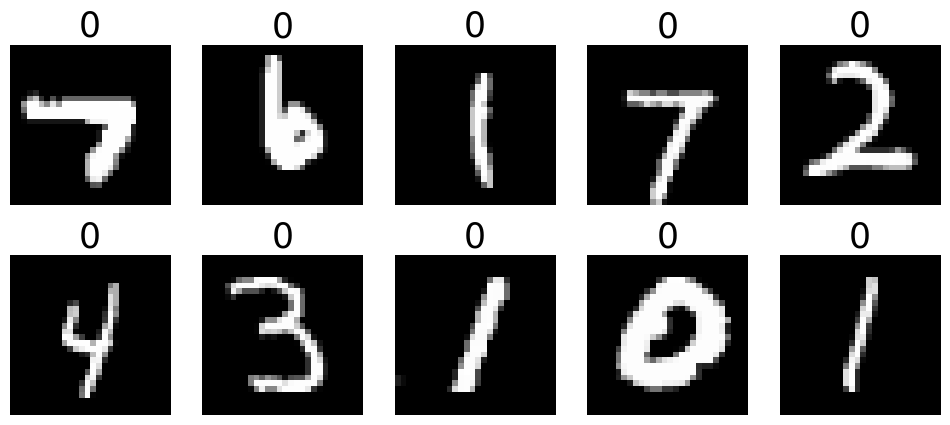

In [38]:
fig, axes = plt.subplots(2,5, figsize=(12,5))
axes = axes.flatten()
idx = np.random.randint(0,42000,size=10)
for i in range(10):
    axes[i].imshow(X_data[idx[i],:].reshape(28,28), cmap='gray')
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(str(int(y_data[idx[i]])), color= 'black', fontsize=25)
plt.show()

In [45]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [59]:
early_stopping=EarlyStopping(patience=5,min_delta=0.001,restore_best_weights=True)

In [56]:
model=Sequential([
    BatchNormalization(input_shape=[784]),
    Dense(500,activation='relu'),
    Dropout(rate=0.5),
    Dense(250,activation='relu'),
    Dropout(rate=0.5),
    Dense(100,activation='relu'),
    Dropout(rate=0.5),
    Dense(50,activation='relu'),
    Dense(20,activation='relu'),
    Dense(10,activation='softmax')
])

In [60]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [58]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 500)               392500    
                                                                 
 dropout_3 (Dropout)         (None, 500)               0         
                                                                 
 dense_7 (Dense)             (None, 250)               125250    
                                                                 
 dropout_4 (Dropout)         (None, 250)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               25100     
                                                      

In [62]:
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid),callbacks=[early_stopping])

Epoch 1/100
985/985 [==============================] - 14s 12ms/step - loss: 0.8233 - accuracy: 0.7383 - val_loss: 0.2975 - val_accuracy: 0.9254
Epoch 2/100
985/985 [==============================] - 15s 15ms/step - loss: 0.3793 - accuracy: 0.8963 - val_loss: 0.2382 - val_accuracy: 0.9441
Epoch 3/100
985/985 [==============================] - 12s 12ms/step - loss: 0.3022 - accuracy: 0.9205 - val_loss: 0.1881 - val_accuracy: 0.9542
Epoch 4/100
985/985 [==============================] - 15s 15ms/step - loss: 0.2540 - accuracy: 0.9332 - val_loss: 0.1845 - val_accuracy: 0.9558
Epoch 5/100
985/985 [==============================] - 13s 13ms/step - loss: 0.2248 - accuracy: 0.9402 - val_loss: 0.1949 - val_accuracy: 0.9605
Epoch 6/100
985/985 [==============================] - 15s 15ms/step - loss: 0.2067 - accuracy: 0.9457 - val_loss: 0.1510 - val_accuracy: 0.9630
Epoch 7/100
985/985 [==============================] - 12s 12ms/step - loss: 0.1914 - accuracy: 0.9493 - val_loss: 0.1752 - val_ac

In [64]:
y_pred=model.predict(test)


875/875 [==============================] - 3s 3ms/step


In [65]:
test['Label']=y_pred.argmax(axis=1)
test['ImageId']=test.index + 1

In [66]:
test[['ImageId','Label']].to_csv('submission.csv',index=False)